In [2]:
import pandas as pd
import folium
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.pyplot import figure
import numpy as np
import matplotlib.cm as cm
import folium
from folium.plugins import FastMarkerCluster

from IPython.display import IFrame
from IPython.core.display import display
from IPython.display import HTML

In [3]:
toilet = pd.read_csv(r'toiletmapexport_200801_114130.csv')
toilet

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,ToiletID,URL,Name,Address1,Town,State,Postcode,AddressNote,Male,Female,...,Showers,DrinkingWater,SharpsDisposal,SanitaryDisposal,IconURL,IconAltText,Notes,Status,Latitude,Longitude
0,1,https://toiletmap.gov.au/toilet/1,Sandy Beach Reserve,West Road,Bassendean,Western Australia,6054.0,NaN,True,True,...,True,False,True,False,https://toiletmap.gov.au/images/icons/mfa.png,"Male and Female, or Unisex (Accessible)",NaN,Verified,-31.921836,115.950206
1,2,https://toiletmap.gov.au/toilet/2,Point Reserve,North Road,Bassendean,Western Australia,6054.0,NaN,True,True,...,False,False,False,False,https://toiletmap.gov.au/images/icons/mfa.png,"Male and Female, or Unisex (Accessible)",NaN,Verified,-31.904410,115.960991
2,3,https://toiletmap.gov.au/toilet/3,Success Hill Reserve,Off Seventh Avenue,Bassendean,Western Australia,6054.0,NaN,True,True,...,True,True,True,False,https://toiletmap.gov.au/images/icons/mfa.png,"Male and Female, or Unisex (Accessible)",NaN,Verified,-31.896289,115.955781
3,4,https://toiletmap.gov.au/toilet/4,Jubilee Reserve,Robinson Road,Eden Hill,Western Australia,6054.0,NaN,True,True,...,False,False,True,False,https://toiletmap.gov.au/images/icons/mf.png,"Male and Female, or Unisex",NaN,Verified,-31.891474,115.940164
4,5,https://toiletmap.gov.au/toilet/5,Ashfield Reserve,Guildford Road,Ashfield,Western Australia,6054.0,NaN,True,True,...,False,False,True,False,https://toiletmap.gov.au/images/icons/mf.png,"Male and Female, or Unisex",NaN,Verified,-31.913433,115.936477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18477,55067,https://toiletmap.gov.au/toilet/55067,Keilor Central,80 Taylors Road,Keilor Downs,Victoria,3038.0,NaN,True,True,...,False,False,False,False,https://toiletmap.gov.au/images/icons/mfa.png,"Male and Female, or Unisex (Accessible)",NaN,Unverified,-37.726993,144.807308
18478,55069,https://toiletmap.gov.au/toilet/55069,Mildura City Heart,63 Langtree Mall,Mildura,Victoria,3500.0,NaN,True,True,...,False,False,False,False,https://toiletmap.gov.au/images/icons/mfa.png,"Male and Female, or Unisex (Accessible)",NaN,Unverified,-34.184761,142.160724
18479,55071,https://toiletmap.gov.au/toilet/55071,Moonee Ponds Central,14-16 Hall Street,Moonee Ponds,Victoria,3039.0,NaN,True,True,...,False,False,False,False,https://toiletmap.gov.au/images/icons/mfa.png,"Male and Female, or Unisex (Accessible)",NaN,Unverified,-37.764632,144.921956
18480,55073,https://toiletmap.gov.au/toilet/55073,Bentons Square Shopping Centre,210 Dunns Road,Mornington,Victoria,3931.0,NaN,True,True,...,False,False,False,False,https://toiletmap.gov.au/images/icons/mfa.png,"Male and Female, or Unisex (Accessible)",NaN,Unverified,-38.245528,145.047633


<h3> Objectives </h3> <br>
1) Which state and town has the most number of toilets? <br>
2) Features: gender-neutrality, showers, drinking water, sanitary disposal, baby changing room. Categorized by state. (Bubble plot) <br>
3) Map of toilets across Australia. 

In [45]:
state = toilet[['State', 'ToiletID']].groupby(['State']).count().sort_values(by = 'ToiletID')
state

,ToiletID
State,
Australian Capital Territory,180
Northern Territory,232
Tasmania,834
South Australia,1597
Western Australia,2058
Victoria,3684
Queensland,3711
New South Wales,6186


Number of gendered and unisex bathrooms

In [272]:
#Converting values to string

toilet[['Female', 'Male', 'Unisex', 'Showers', 'DrinkingWater', 'SanitaryDisposal','BabyChange', 'BabyCareRoom']] = toilet[['Female', 'Male', 'Unisex', 'Showers', 'DrinkingWater', 'SanitaryDisposal','BabyChange', 'BabyCareRoom']].astype(str)

#Counting categories

toilet1 = toilet.replace('False', np.nan)
toilet1 = toilet1.groupby(['State']).count()
toilet1['area'] = toilet1.index
toilet1['Population'] = [411986, 7867052, 247659, 4928412, 1723714, 522279, 6320292, 2574762]
toilet1['GSP'] = [40879, 614409, 26109, 357044, 107990, 31819, 446079, 260640]
toilet1

,ToiletID,URL,Name,Address1,Town,Postcode,AddressNote,Male,Female,Unisex,...,SanitaryDisposal,IconURL,IconAltText,Notes,Status,Latitude,Longitude,area,Population,GSP
State,,,,,,,,,,,,,,,,,,,,,
Australian Capital Territory,180,180,180,180,180,167,22,157,157,19,...,30,180,180,6,180,180,180,Australian Capital Territory,411986,40879
New South Wales,6186,6186,6186,6186,6186,5970,1105,4898,4902,952,...,1136,6186,6184,598,6186,6186,6186,New South Wales,7867052,614409
Northern Territory,232,232,232,232,232,228,29,196,196,23,...,63,232,232,25,232,232,232,Northern Territory,247659,26109
Queensland,3711,3711,3711,3711,3711,3610,627,2924,2918,506,...,695,3711,3709,488,3711,3711,3711,Queensland,4928412,357044
South Australia,1597,1597,1597,1597,1597,1589,221,1154,1152,338,...,468,1597,1597,271,1597,1597,1597,South Australia,1723714,107990
Tasmania,834,834,834,834,834,803,104,501,501,244,...,158,834,834,29,834,834,834,Tasmania,522279,31819
Victoria,3684,3684,3684,3684,3684,3582,550,2814,2810,681,...,667,3684,3677,296,3684,3684,3684,Victoria,6320292,446079
Western Australia,2058,2058,2058,2058,2058,2057,320,1655,1652,271,...,457,2058,2057,189,2058,2058,2058,Western Australia,2574762,260640


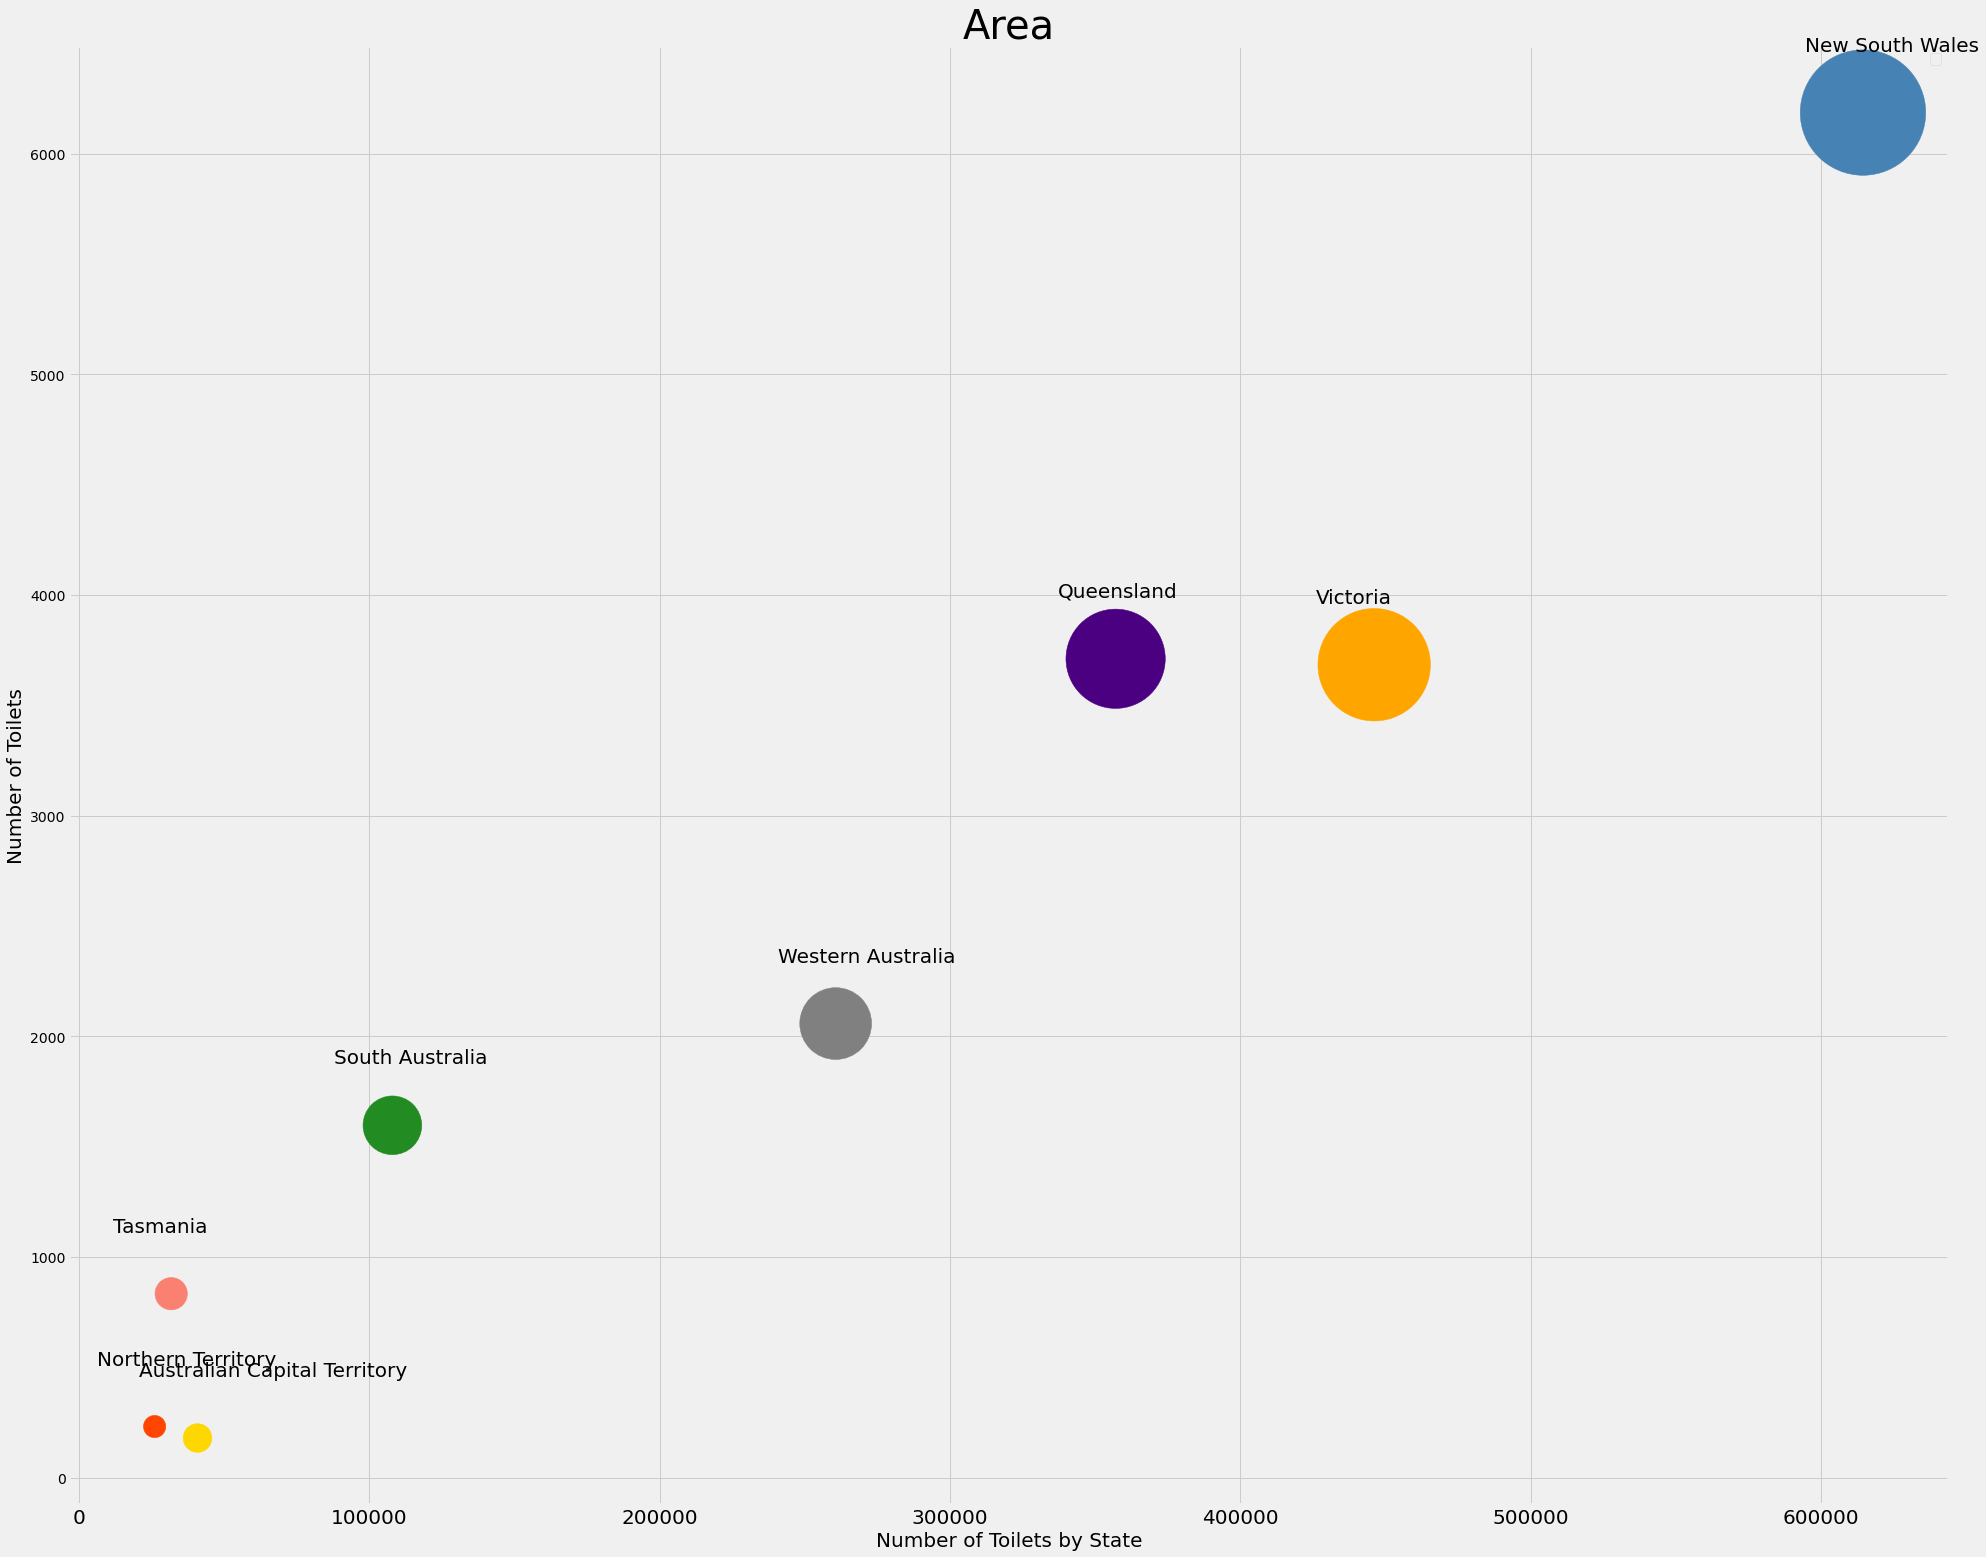

In [282]:
plt.style.use('fivethirtyeight') 

colors = ['gold', 'steelblue', 'orangered', 'indigo', 'forestgreen', 'salmon', 'orange', 'gray']
plt.figure(figsize=(30, 25))
plt.scatter(toilet1['GSP'], toilet1['ToiletID'], s = toilet1['Population']/500, cmap= cm.Set1, c =colors)

for i, rows in toilet1.iterrows():
    plt.annotate((rows['area']), xy=(rows['GSP']-20000, rows['ToiletID']+280), fontsize= 20, rotation=0)

plt.xlabel('Number of Toilets by State', fontsize = 20)
plt.xticks(fontsize=20)
plt.title('Area', fontsize= 40)
plt.ylabel('Number of Toilets', fontsize=20)
plt.legend('')
plt.savefig(r'C:\Users\TEMP\Desktop\Ariane blogs things\Australian toilets\toilet_count.png', bbox_inches='tight')

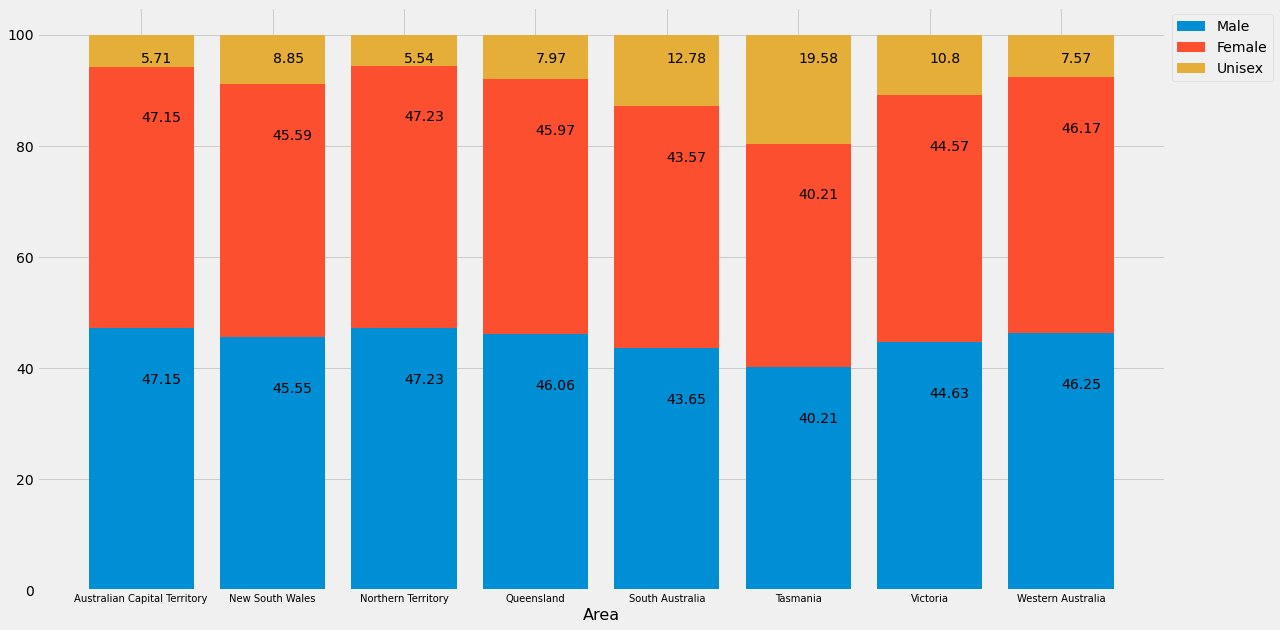

In [178]:
# From raw value to percentage
totals = [i+j+k for i,j,k in zip(toilet1['Male'], toilet1['Female'], toilet1['Unisex'])]
toilet1['bar1'] = [i / j * 100 for i,j in zip(toilet1['Male'], totals)]
toilet1['bar2'] = [i / j * 100 for i,j in zip(toilet1['Female'], totals)]
toilet1['bar3'] = [i / j * 100 for i,j in zip(toilet1['Unisex'], totals)]

area1 = toilet1.index

plt.figure(figsize=(18, 10))
plt.bar(area1, toilet1['bar1'], label = 'Male')
plt.bar(area1, toilet1['bar2'], bottom = bar1, label = 'Female')
plt.bar(area1, toilet1['bar3'], bottom = [i+j for i, j in zip(bar1, bar2)], label = 'Unisex')

plt.xticks(area1, fontsize = 10)
plt.xlabel('Area', fontsize= 16)

for i, rows in toilet1.iterrows():
    plt.annotate(round(rows['bar1'],2), xy=(i, rows['bar1']-10), rotation=0)
    plt.annotate(round(rows['bar2'],2), xy=(i, rows['bar1']+rows['bar2']-10), rotation=0)
    plt.annotate(round(rows['bar3'],2), xy=(i, rows['bar1']+rows['bar2']+rows['bar3']-5), rotation=0)
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)

plt.show()

Baby friendliness

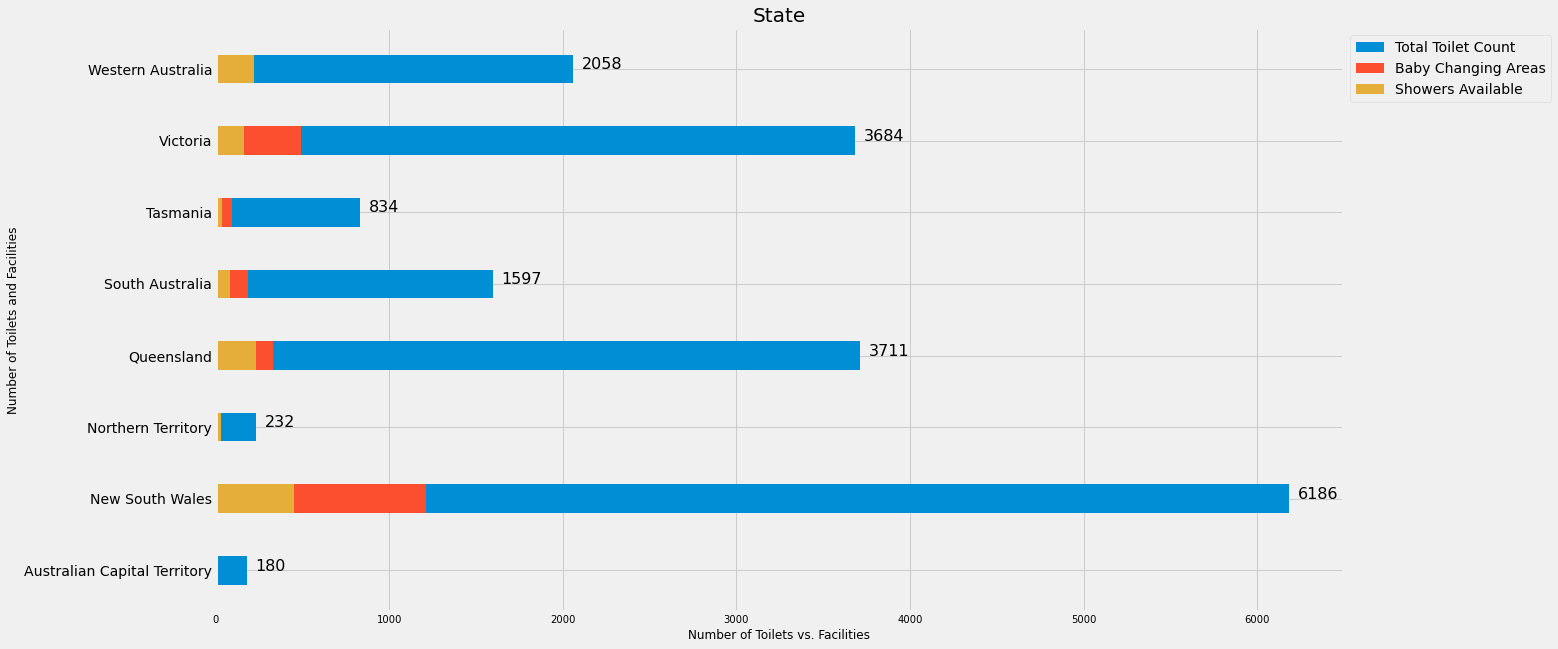

In [218]:
area = toilet1.index
barWidth = 0.25
plt.figure(figsize=(18, 10))

plt.barh(area, toilet1['ToiletID'], height=0.4, label = 'Total Toilet Count')
plt.barh(area, toilet1['BabyChange'], height=0.4, label = 'Baby Changing Areas')
plt.barh(area, toilet1['Showers'], height=0.4, label = 'Showers Available')

# Create annotation
for i, rows in toilet1.iterrows():
    plt.annotate(int(rows['ToiletID']), xy=(rows['ToiletID']+50,i), fontsize = 16, rotation=0)


plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
    
plt.xlabel('Number of Toilets vs. Facilities', fontsize = 12)
plt.xticks(fontsize=10)
plt.title('State', fontsize= 20)
plt.ylabel('Number of Toilets and Facilities', fontsize=12)
plt.savefig(r'C:\Users\TEMP\Desktop\Ariane blogs things\Australian toilets\toilet_count_facilities.png', bbox_inches='tight')

<h1> Mapping toilets </h1>

In [4]:
m = folium.Map(location = [-25.274398, 133.77513599999997], 
                zoom_start = 4)

# I can add marker one by one on the map
FastMarkerCluster(data=list(zip(toilet['Latitude'].values, toilet['Longitude'].values))).add_to(m)
folium.LayerControl().add_to(m)

for index, row in toilet.iterrows():

    # generate the popup message that is shown on click.
    popup_text = "{}<br> Location:"
    popup_text = popup_text.format(row['Name'])

    folium.CircleMarker(location=(row['Latitude'],
                                  row['Longitude']),
                        color="#007849",
                        popup = popup_text,
                        fill=True).add_to(m)
m.save('Aus_toilet.html')

In [17]:
def embed(m, width='100%', height='510px', *args, **kwargs):
    """
    Embeds a folium map in a IPython/Jupyter notebook.
    This method will not work if the map depends on any files (json data). Also this uses
    the HTML5 srcdoc attribute, which may not be supported in all browsers.
    fmaps -- a single folium map or an iterable containing folium maps
    """
    from IPython.display import HTML
    template = '<iframe srcdoc="{srcdoc}" style="width: {width}; height: {height}; border: none"></iframe>'
    html = ''
    try:
        for m in m:
            m._build_map()
            html += template.format(
                srcdoc=m.HTML.replace('"', '&quot;'),
                height=str(height),
                width=str(width),
            )
    except TypeError:
        m = m
        m._build_map()
        html = template.format(
            srcdoc=fmap.HTML.replace('"', '&quot;'),
            height=str(height),
            width=str(width),
        )
        return HTML(html)

In [8]:

    
from IPython.display import IFrame

iframe_html= HTML(IFrame(src='Aus_toilet.html', width=700, height=600))

TypeError: 'IFrame' object is not subscriptable